In [1]:
import os
import matplotlib.pyplot as plt

original_size = os.path.getsize("the_simpsons.jpg")

hasil = {
    'Sobel': 'Hasil/Deteksi Tepi_Sobel.jpg',
    'Robert': 'Hasil/Deteksi Tepi_Robert.jpg',
    'Laplacian': 'Hasil/Deteksi Tepi_Laplacian.jpg',
    'Prewitt': 'Hasil/Deteksi Tepi_Prewitt.jpg',
    'LoG': 'Hasil/Deteksi Tepi_LoG.jpg'
}


## PERBANDINGAN HASIL DETEKSI SECARA VISUAL

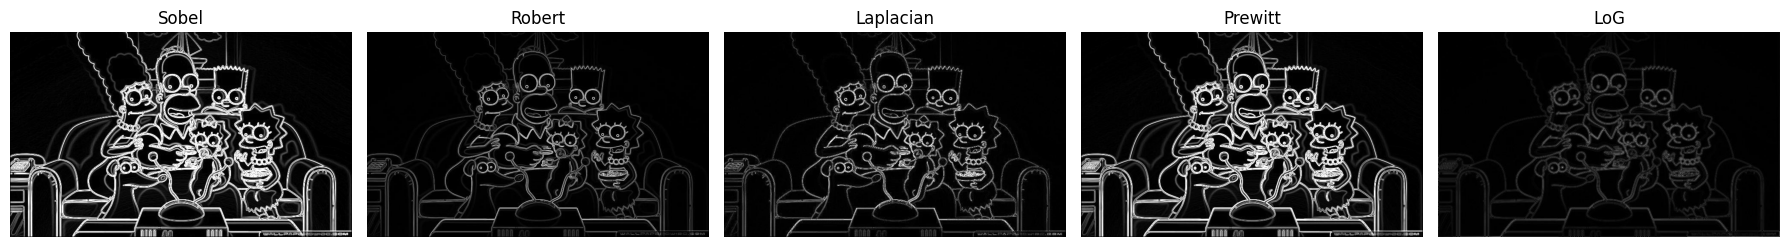

In [2]:
fig, axes = plt.subplots(1, len(hasil), figsize=(18, 4))
for ax, (name, path) in zip(axes, hasil.items()):
    if os.path.exists(path):
        img = plt.imread(path)
        ax.imshow(img, cmap='gray')
        ax.set_title(name)
        ax.axis('off')
    else:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

### Analisis Hasil Secara Visual

Dilihat dari tebal garis dari hasil deteksi tepi, 
- Metode yang menghasilkan garis tepi paling tebal adalah metode **Sobel** yang berarti menghasilkan gambar yang paling jelas.
- Sebaliknya, yang menghasilkan garis tepi paling tipis adalah metode **Laplacian of Gaussian** yang berarti menghasilkan gambar yang paling kurang jelas.

## PERBANDINGAN COMPRESSION RATIO

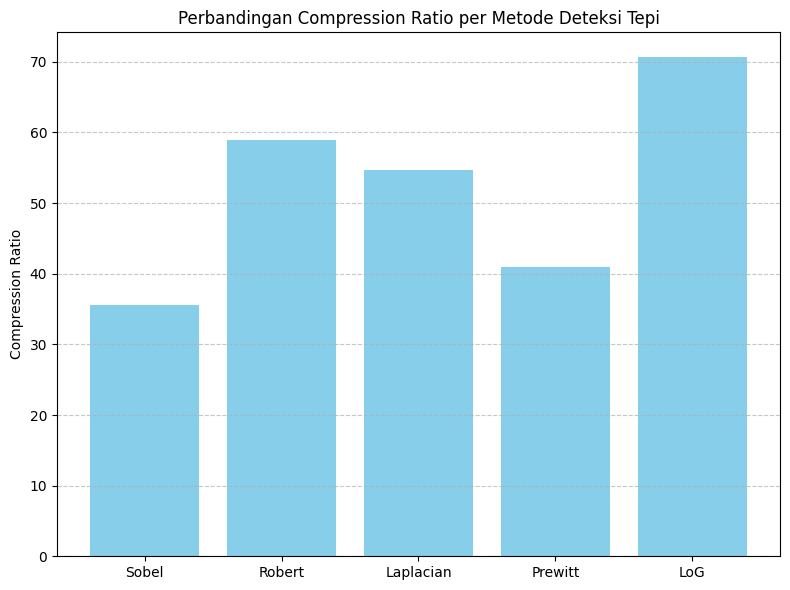

In [3]:
compression_ratios = {}
for name, path in hasil.items():
    if os.path.exists(path):
        compressed_size = os.path.getsize(path)
        ratio = 100 - (compressed_size / original_size * 100)
        compression_ratios[name] = ratio
    else:
        print(f'File tidak ditemukan: {path}')
        compression_ratios[name] = 0 

plt.figure(figsize=(8, 6))
plt.bar(compression_ratios.keys(), compression_ratios.values(), color='skyblue')
plt.ylabel('Compression Ratio')
plt.title('Perbandingan Compression Ratio per Metode Deteksi Tepi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analisis Compression Ratio

Secara umum, semakin tinggi Compression Ratio, semakin kecil ukuran file hasil kompresi dibandingkan file asli.
- Metode dengan Compression Ratio tertinggi adalah **Laplacian of Gaussian** (70.65 %), yang berarti metode ini menghasilkan file kompresi paling efisien dibandingkan metode lain.
- Sebaliknya, metode dengan Compression Ratio terendah adalah **Sobel** (35.56 %), yang berarti file hasil kompresinya paling mendekati ukuran asli.

